In [17]:
import dimers_util
import dimers_sim
from dimers_util import *
import dimers_sim
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib
import pickle
from importlib import reload 
reload(dimers_util)
reload(dimers_sim)

<module 'dimers_sim' from 'C:\\Users\\ofir\\OneDrive - Technion\\Research - PhD\\DynamicalConfinement\\DymerKrylov\\dimers_sim.py'>

In [ ]:
d = [105, 115, 125, 135, 145]
times = 200
L = 150
nums = 10000
analysis_res = parallel_analysis(L, times, d, nums)
plot_analysis(analysis_res, d, L, times, nums)

148 880


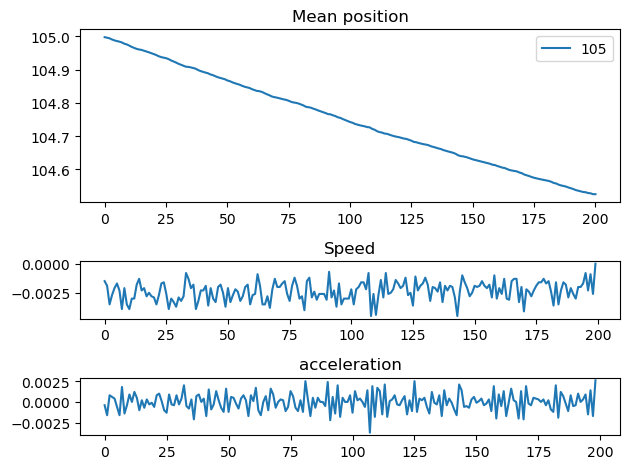

In [28]:
plot_analysis([analysis_res[0]], [d[0]], L, times, nums)

38 220


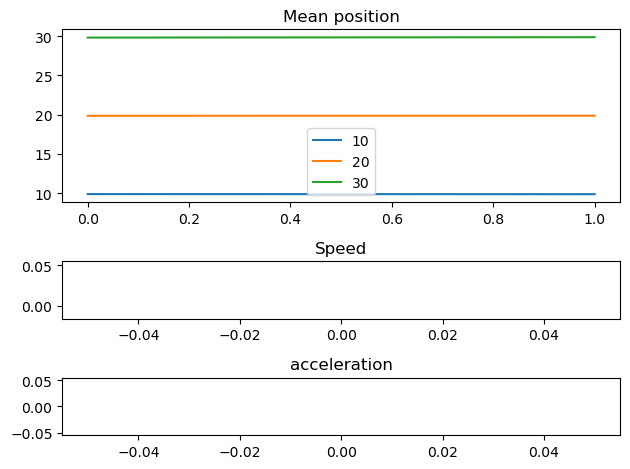

In [18]:
d_sim = [10, 20 ,30]
L_sim = 40
times_sim = 20
nums_sim = 100
simulator = dimers_sim.Simulator(L_sim, times_sim, d_sim, nums_sim)
simulator.parallel_analysis()
dimers_sim.plot_analysis(simulator.analysis_rhos, d_sim, L_sim, times_sim, nums_sim)

In [10]:
simulator.analysis_rhos

[]

In [30]:
len(get_h_ring(1000)), len(get_h_hop(1000))

(998, 5980)

In [ ]:
analysis_res[0]['rho'][:, 1:]

In [14]:
analysis_res[0]['rho'].shape

(201, 150)

In [9]:
# numpy.apply_along_axis
H_ring, H_hopp = get_h_ring(L), get_h_hop(L)
gates = H_ring + H_hopp
p_array = np.concatenate((np.ones(len(H_ring)), np.ones(len(H_hopp))))/(len(H_ring)+len(H_hopp))
psi =  np.array([get_initial_config(10, 5) for i in range(3)])
gates_i = np.random.choice(gates, size=psi.shape[0], p=p_array)

def apply(f, a):
    return f(a)
psi = np.array(map(apply, zip(psi, gates_i))
print(psi)

SyntaxError: invalid syntax (3941479316.py, line 11)